The following MIT license only applies to the code, and not to the text and images.

# MIT License

Copyright (c) 2024 Taha Selim, Alain Chancé, MolKet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

|||
|-|-|
|**Author:** |Taha Selim|
|**Date:** |June 10th, 2024|
|**Tutorial:** |**Version 0** <br/>Quantum Teleportation Protocol*|
|**License:** |MIT License|
|**MolKet's package version:** |0.2|
|**Contact:** | tahaselim@molket.io


# Quantum Teleportation Protocol

Quantum teleportation is a protocol that allows the transfer of quantum information from one qubit to another. Alice wants to send a qubit state to Bob. The quantum teleportation protocol uses two classical bits and an entangled pair of qubits to transfer the state of a qubit from Alice to Bob. The protocol consists of four main steps:

1. **Creating an entangled pair of qubits**: Alice and Bob share an entangled pair of qubits. Each qubit is in a Bell state, which is a superposition of the 0 and 1 states. 

2. **Applying a CNOT gate**: Alice applies a CNOT gate to her second qubit, controlled by the information qubit she wants to send, and the target qubit is her half of the entangled pair.

3. **Applying a Hadamard gate**: Alice applies a Hadamard gate to the information qubit.

4. **Measuring the qubits**: Alice measures the two qubits she has, and the results are sent to Bob. Bob uses this information to recover the state of the information qubit.

In [1]:
include("../molket.jl")


Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor


Let's now implement the quantum teleportation protocol using MolKet's quantum computing package. We will create a quantum circuit that simulates the teleportation of a qubit state from Alice to Bob.

But before we start, let's get familiar with MolKet's framework. The beauty about MolKet's package is that it is designed to be user-friendly and intuitive. It provides a simple interface to create quantum circuits and simulate quantum algorithms. Moreover, it offers a wide range of quantum gates and operations that can be used to build complex quantum circuits. 
Further, you can use both `big-endian` and `little-endian` conventions to represent qubits in MolKet's package.

To create a quantum circuit of n qubits, you can use the following code snippet:

```julia
qc = qc_init(n,big_endian=false)
```
By default, the boolean variable `big_endian` is set to `true` to represent qubits in `big-endian` convention. You can set it to `false` to represent qubits in `little-endian` convention. Hence, if you don't specify the `big_endian` variable, the qubits will be represented in `big-endian` convention.

Hence, if `big_endian` is set to `false` to represent qubits in `little-endian` convention. You can set it to `true` to represent qubits in `big-endian` convention. 

In [4]:
# Here, you can measure the states of the qubits and simulate with a given number of shots 
qc = qc_init(1,big_endian=true)


Main.quantum_circuit.qc_initstruct(1, "big-endian", 2, 2, [1.0, 0.0], [0.0; 1.0;;], Any["0"; "1";;], Any["Op_ind" "Op" … "object" "op_mat"], Bool[1 0; 0 1], true, false, false)

In [10]:
X_gate = q.H

op(qc, q.H, 0)
show_statevector(qc)

0.7071067811865475 * |0>
-0.7071067811865475 * |1>


In [11]:
op(qc, q.Z, 0)
show_statevector(qc)

0.7071067811865475 * |0>
0.7071067811865475 * |1>


We can apply a quantum gate to a qubit using the following code snippet:

```julia
op(qc, q.H, 0)
```

The `op` function takes three arguments: the quantum circuit `qc`, the quantum gate `q.H`, and the target qubit of index `0` in this example. 

We can all the time print the statevector of the quantum circuit using the following code snippet:

```julia
statevector(qc)
```

The `statevector` function takes the quantum circuit `qc` as an argument and returns the statevector of the quantum circuit.

We can measure the qubits of the quantum circuit using the following code snippet:

```julia
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)
```

By default, the `measure_state` function uses the `statevector` simulator to measure the qubits of the quantum circuit. You can specify the number of `shots` to run the simulation multiple times. The `save_fig` boolean variable is set to `false` by default. You can set it to `true` to save the histogram of the measurement results. Measurements are done in the computational basis by default. You can specify the basis to measure the qubits using the `basis` argument which is a keyword argument. The basis can be set to `X`, `Y`, or `Z`. Only at the moment the `Z` basis and 'X' basis are supported.

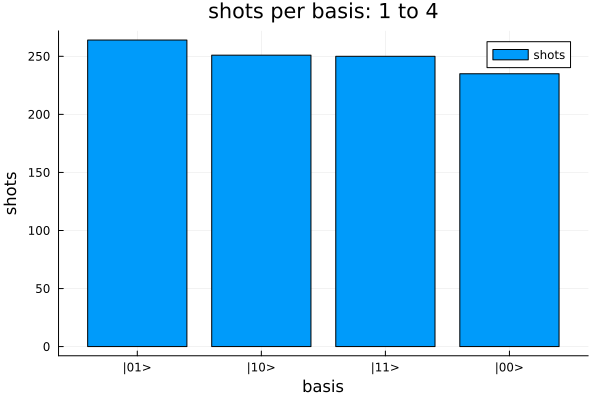

0.4999999999999999 * |00>
0.4999999999999999 * |01>
0.4999999999999999 * |10>
0.4999999999999999 * |11>


In [5]:
qc = qc_init(2)
op(qc, q.H, 0)
op(qc, q.H, 1)
show_statevector(qc)
peek_states(qc)
shots = 1000
# statevector simulator
measure_state(qc,shots;save_fig=false)
# the statevector is normalized, check the probabilities of the states.
# Check for yourself that the probabilities are the same as or close to 
# ... the statevector simulator

Now, let's implement the quantum teleportation protocol using MolKet's quantum computing package. We will create a quantum circuit that simulates the teleportation of a qubit state from Alice to Bob.

First, we need to create a quantum circuit of three qubits. The first qubit is the information qubit that Alice wants to send to Bob. The second and third qubits are the entangled pair of qubits shared between Alice and Bob. We will represent the qubits in `big-endian` convention.

Hence, Alice has two qubits, the first one is the information qubit, and the second one is her half of the entangled pair. Bob has one qubit, which is his half of the entangled pair.

After initializing the quantum circuit, you can check the statevector of the quantum circuit to see the initial state of the qubits which is the ground state $\vert 000 \rangle$.

In [7]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
#show the statevector
show_statevector(qc)

1.0 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
0.0 * |100>
0.0 * |101>
0.0 * |110>
0.0 * |111>


Now, lwt's create the entangled pair of qubits, between qubit 1 and qubit 2. We will create a Bell state by applying a Hadamard gate to qubit 1 and a CNOT gate with qubit 1 as the control qubit and qubit 2 as the target qubit. We can then check the statevector of the quantum circuit to see the entangled pair of qubits.

Let' implement a function that creates the entangled pair of qubits depending on the input states of the qubits. The function takes the quantum circuit `qc` and the input states of the qubits as arguments. The input states are qubits 1 and 2. The function applies a Hadamard gate to qubit 1 and a CNOT gate with qubit 1 as the control qubit and qubit 2 as the target qubit. The function returns the quantum circuit `qc` with the entangled pair of qubits.



In [12]:
# create bell pair depending on the input states of the qubits
function bell_pair_q0q1(qc,q0,q1;q0_state=0,q1_state=0)
    if q0_state == 1
        op(qc, q.X, q0)
    end
    if q1_state == 1
        op(qc, q.X, q1)
    end
    op(qc, q.H, q0)
    op(qc, q.X, q1, q1_control = q0)
    return qc
end

bell_pair_q0q1 (generic function with 1 method)

We can combine the steps so far in the cell below.

In [13]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
# create bell pair between q_1 and q_2
bell_pair_q0q1(qc,1,2)

#show the statevector
show_statevector(qc)

0.7071067811865475 * |000>
0.0 * |001>
0.0 * |010>
0.7071067811865475 * |011>
0.0 * |100>
0.0 * |101>
0.0 * |110>
0.0 * |111>


We can check the statevector of the quantum circuit to see the entangled pair of qubits. The statevector should be in a superposition of the Bell states for the second and third qubit $\frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$ while the first qubit is in the ground state $\vert 0 \rangle$.

Now, let's create the information qubit that Alice wants to send to Bob. We will create a random qubit state by applying a Hadamard gate and X gate to the first qubit. We can then check the statevector of the quantum circuit to see the information qubit.

In [15]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
# create a given state on q_0 
op(qc, q.X, 0)
op(qc, q.H, 0)
# check the statevector
show_statevector(qc)


0.7071067811865475 * |000>
0.0 * |001>
0.0 * |010>
0.0 * |011>
-0.7071067811865475 * |100>
0.0 * |101>
0.0 * |110>
0.0 * |111>


In [16]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
# create a given state on q_0 
op(qc, q.X, 0)
op(qc, q.H, 0)
# create bell pair
op(qc, q.H, 1)
op(qc, q.X, 2, q1_control = 1)


Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [0.4999999999999999, 0.0, 0.0, 0.4999999999999999, -0.4999999999999999, 0.0, 0.0, -0.4999999999999999], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0], Any["000"; "001"; … ; "110"; "111";;], Any["Op_ind" "Op" … "object" "op_mat"; 1 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]; … ; 3 "[0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475]" … [0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; -0.4999999999999999 0.0 … -0.4999999999999999 0.0; 0.0 -0.4999999999999999 … 0.0 -0.4999999999999999]; 4 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; 0.0 -0.4999999999999999 … 0.0 -0.4999999999999999; -0

To reverse the entaglement, we can apply the same operations in reverse order. 
However, this time, we will apply it between the information qubit and the 
second qubit of Alice. 

In [18]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
# create a given state on q_0 
op(qc, q.X, 0)
op(qc, q.H, 0)
# create bell pair
op(qc, q.H, 1)
op(qc, q.X, 2, q1_control = 1)
# reverse the operation of the bell pair
op(qc, q.X, 1, q1_control = 0)
op(qc, q.H, 0)

Main.quantum_circuit.qc_initstruct(3, "big-endian", 2, 8, [0.3535533905932737, -0.3535533905932737, -0.3535533905932737, 0.3535533905932737, 0.3535533905932737, 0.3535533905932737, 0.3535533905932737, 0.3535533905932737], [0.0 0.0 0.0; 0.0 0.0 1.0; … ; 1.0 1.0 0.0; 1.0 1.0 1.0], Any["000"; "001"; … ; "110"; "111";;], Any["Op_ind" "Op" … "object" "op_mat"; 1 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]; … ; 5 "[0.0 1.0; 1.0 0.0]" … [0.0 1.0; 1.0 0.0] [0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 0.4999999999999999 … 0.0 0.4999999999999999; … ; -0.4999999999999999 0.0 … 0.4999999999999999 0.0; 0.0 -0.4999999999999999 … 0.0 0.4999999999999999]; 6 "[0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475]" … [0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475] [0.3535533905932737 -0.3535533905932737 … 0.3535533905932737 -0.3535533905932737; -0.3535533905932

Alice now has to measure her two qubits and send the results to Bob. Bob will use this information to recover the state of the information qubit:

| q_0       | q_1       | Operation(s)   |
|-----------|-----------|----------------|
| 0         | 0         | Do nothing     |
| 0         | 1         | Apply Z gate   |
| 1         | 0         | Apply X gate   |
| 1         | 1         | Apply XZ gate  |

We can create a function that applies the necessary operations to Bob's qubit depending on the measurement results of Alice's qubits. 

In [19]:
# based on the measurements of Alice's qubits, Bob will apply the necessary gates to decode the information
# create a function to decode the information
function qteleport_decode(qc, q0_state, q1_state)
    # Inputs:
    # qc: quantum circuit
    # q0_state: state of qubit 0
    # q1_state: state of qubit 1
    # Outputs:
    # qc: quantum circuit with decoded information
    # apply the necessary gates to decode the information
    if q0_state == 1
        op(qc, q.X, 2)
    end
    if q1_state == 1
        op(qc, q.Z, 2)
    end
    return qc
end # end of the function decode

qteleport_decode (generic function with 1 method)

In [ ]:
# create a quantum circuit with 3 qubits
qc = qc_init(3)
# create a given state on q_0 
op(qc, q.X, 0)
op(qc, q.H, 0)
# create bell pair
op(qc, q.H, 1)
op(qc, q.X, 2, q1_control = 1)
# reverse the operation of the bell pair
op(qc, q.X, 1, q1_control = 0)
op(qc, q.H, 0)
# qubits 0 and 1 are measured
qubits = [0,1]  # qubits to measure
bas = "Zbas"     # basis to measure
